<a href="https://colab.research.google.com/github/jedrzej00/viewereeg/blob/master/TKEO_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lib import and data load

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df = pd.read_csv("SS_record-[2015.09.17-15.11.32].csv") 

In [0]:
#Event_id holds time of events only 205 rows
bool_series = pd.notnull(df["Event_Id"]) 
df[bool_series]

##TKEO calculations

In [8]:
df.head()

,Time345Hz,Epoch,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Event_Id,Event_Date,Event_Duration
0,0.000000,0,-5.192708,10.874015,-0.169481,28.420797,-9.902622,-2.941348,16.019693,21.373163,-3.530942,14.741348,NaN,NaN,NaN
1,0.002899,0,-4.811602,9.520370,-0.752539,27.603233,-9.492777,-3.793050,15.271902,20.472820,-3.754041,13.668789,NaN,NaN,NaN
2,0.005797,0,-4.862282,9.367349,-1.389566,27.835459,-9.296375,-4.810861,15.637087,20.404449,-3.934754,13.834256,NaN,NaN,NaN
3,0.008696,0,-5.754417,10.096045,-2.239412,28.820263,-9.700782,-6.171382,16.770576,20.862041,-4.435250,14.990154,NaN,NaN,NaN
4,0.011594,0,-6.418258,10.319262,-2.562741,29.147823,-9.649807,-6.864820,17.176014,20.839088,-4.571852,15.685919,NaN,NaN,NaN


In [19]:
df.Channel_1.diff()

0              NaN
1         0.381106
2        -0.050680
3        -0.892136
4        -0.663840
            ...   
169595   -0.561977
169596   -0.850412
169597   -1.992626
169598   -3.777540
169599   -4.468859
Name: Channel_1, Length: 169600, dtype: float64

In [81]:
dt=df.Time345Hz[1]
print (dx)
np.gradient(df.Channel_1,dx,edge_order=2) #this method was tested in labview environment
pochodna = np.gradient(df.Channel_1,dx,edge_order=2)
print (TKEO)

0.0028985506
[  42421.39892196    3248.83182119   26450.3536422  ...  990729.08027337
 2023517.27685996 2758950.14319857]


In [0]:
TKEO1 = np.gradient(np.gradient(df.Channel_1,dx,edge_order=2),edge_order=2) ** 2 - df.Channel_1 * np.gradient(np.gradient(df.Channel_1,dx,edge_order=2),dx,edge_order=2)

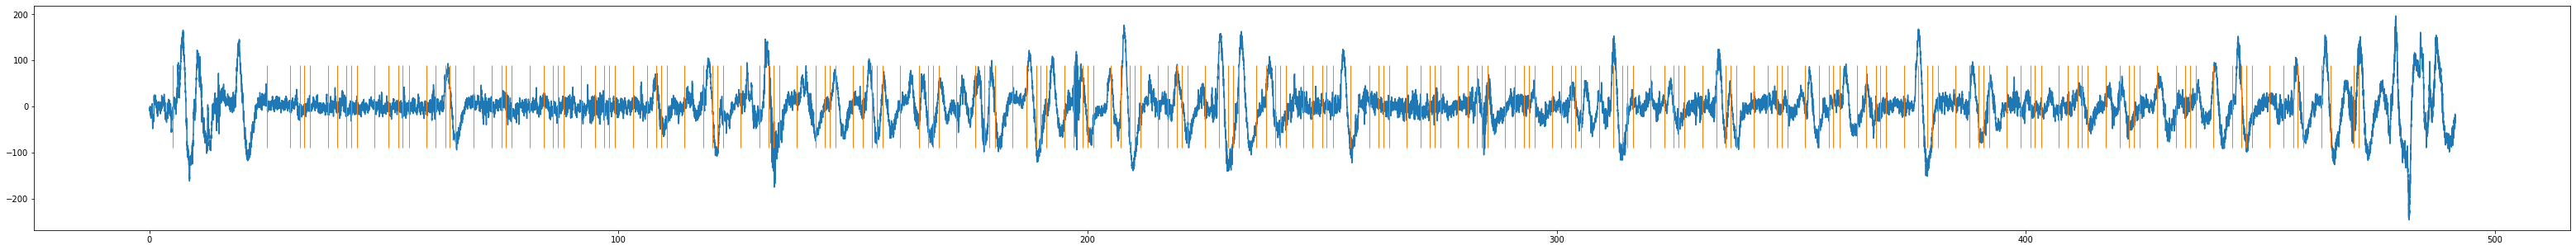

In [98]:
plt.figure(figsize=(55,5))
plt.plot(df.Time345Hz, df.Channel_1);
plt.plot(df[bool_series].Time345Hz, np.zeros(205), '|', ms=100);

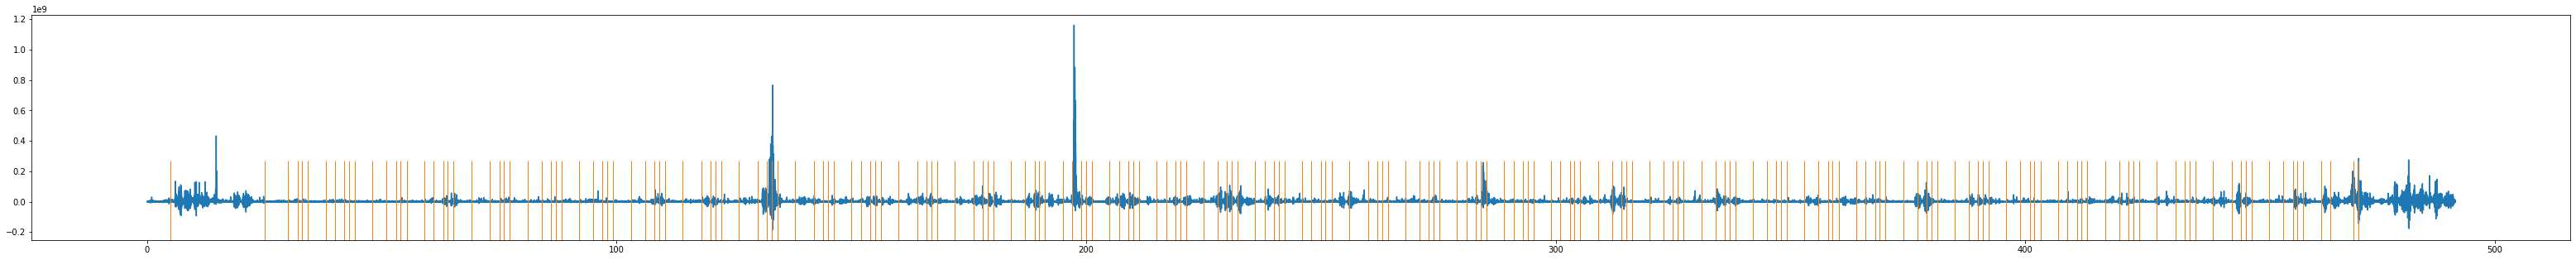

In [99]:
plt.figure(figsize=(55,5))
plt.plot(df.Time345Hz, TKEO1);
plt.plot(df[bool_series].Time345Hz, np.zeros(205), '|', ms=100);

In [0]:
#2nd order central difference